# Examen Módulo I 1.0

## Importar

In [1]:
import time
start = time.time()

In [2]:
# %load basic
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import chardet

In [4]:
## Definir tono de audio
from IPython.lib.display import Audio

framerate = 4410
play_time_seconds = 1

t = np.linspace(0, play_time_seconds, framerate*play_time_seconds)
audio_data = np.sin(5*np.pi*300*t) + np.sin(2*np.pi*240*t)

In [5]:
import seaborn as sns

In [6]:
## Conocer encoding
with open('/home/ef/Documents/Diplomado/EXAMEN01/asg-2020-07-31.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))
   
print(result)

{'encoding': 'ISO-8859-1', 'confidence': 0.73, 'language': ''}


In [7]:
data = pd.read_csv('/home/ef/Documents/Diplomado/EXAMEN01/asg-2020-07-31.csv',
                   sep = "|",
                   encoding = 'ISO-8859-1',
                   low_memory = False,
                   error_bad_lines = False)
data.sample(4)

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,...,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
1223741,14,22,14,B82,9.0,93.0,9303.0,S3,2,E7,...,1,0,0,1,0,270.39,0.00,0.0,270.39,0.0
2827244,22,22,21,Y46,6.0,65.0,6503.0,S3,2,E8,...,23,1,0,22,0,3108.26,133.59,0.0,2974.67,0.0
2710067,22,1,21,E06,6.0,62.0,6209.0,S3,2,E10,...,1,0,0,1,0,463.90,0.00,0.0,463.90,0.0
1069972,12,2,12,B61,8.0,87.0,8702.0,S4,2,E9,...,1,0,0,1,0,247.13,0.00,0.0,247.13,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4470204 entries, 0 to 4470203
Data columns (total 29 columns):
 #   Column              Dtype  
---  ------              -----  
 0   cve_delegacion      int64  
 1   cve_subdelegacion   int64  
 2   cve_entidad         int64  
 3   cve_municipio       object 
 4   sector_economico_1  float64
 5   sector_economico_2  float64
 6   sector_economico_4  float64
 7   tamaño_patron       object 
 8   sexo                int64  
 9   rango_edad          object 
 10  rango_salarial      object 
 11  rango_uma           object 
 12  asegurados          int64  
 13  no_trabajadores     int64  
 14  ta                  int64  
 15  teu                 int64  
 16  tec                 int64  
 17  tpu                 int64  
 18  tpc                 int64  
 19  ta_sal              int64  
 20  teu_sal             int64  
 21  tec_sal             int64  
 22  tpu_sal             int64  
 23  tpc_sal             int64  
 24  masa_sal_ta         floa

## Calidad de datos

### Valores ausentes

In [9]:
dim_antes = data.shape[0]
data.shape

(4470204, 29)

In [10]:
## Existen valores ausentes, pero tranquilos, todo tiene explicación
data.isnull().sum() / data.shape[0]

cve_delegacion        0.000000
cve_subdelegacion     0.000000
cve_entidad           0.000000
cve_municipio         0.113510
sector_economico_1    0.003642
sector_economico_2    0.003642
sector_economico_4    0.003642
tamaño_patron         0.005876
sexo                  0.000000
rango_edad            0.000000
rango_salarial        0.005925
rango_uma             0.005925
asegurados            0.000000
no_trabajadores       0.000000
ta                    0.000000
teu                   0.000000
tec                   0.000000
tpu                   0.000000
tpc                   0.000000
ta_sal                0.000000
teu_sal               0.000000
tec_sal               0.000000
tpu_sal               0.000000
tpc_sal               0.000000
masa_sal_ta           0.000000
masa_sal_teu          0.000000
masa_sal_tec          0.000000
masa_sal_tpu          0.000000
masa_sal_tpc          0.000000
dtype: float64

In [11]:
## En la clave de municipio (variable con más outliers) el valor ausente significa CDMX
data['cve_municipio'].fillna('MEX', inplace = True)
data['cve_municipio'].isnull().sum()

0

In [12]:
## Respecto al sector económico, los valores ausentes significa que no hay empleo asociado,
## pueden ser asegurados familiares de trabajadores en el IMSS, CFE, etc. Se omiten
data = data[~(data['sector_economico_1'].isnull())].copy()
data.reset_index(drop = True, inplace = True)
data[['sector_economico_1', 'sector_economico_2', 'sector_economico_4']].isnull().sum()

sector_economico_1    0
sector_economico_2    0
sector_economico_4    0
dtype: int64

In [13]:
## Aún se cuenta con gran % de los registros originales
data.shape[0] / dim_antes

0.996358331745039

In [14]:
## Los registros vacíos en el rango salarial pueden agruparse con
## "hasta 1 salario mín":W1 (sigue siendo la categoría más pequeña)
data['rango_salarial'].value_counts(dropna = False)

W2     1660141
W3      801435
W4      456592
W5      337670
W6      235052
W7      177208
W8      142524
W9      111779
W10      92211
W18      83726
W11      72861
W12      61421
W13      51573
W14      43653
W15      39515
W16      33084
W17      30365
W1       12908
NaN      10207
Name: rango_salarial, dtype: int64

In [15]:
## Mismo proceso para "rango_uma"
data['rango_salarial'].fillna('W1', inplace = True)
data['rango_uma'].fillna('W1', inplace = True)
data[['rango_salarial', 'rango_uma']].isnull().sum()

rango_salarial    0
rango_uma         0
dtype: int64

In [16]:
data.columns

Index(['cve_delegacion', 'cve_subdelegacion', 'cve_entidad', 'cve_municipio',
       'sector_economico_1', 'sector_economico_2', 'sector_economico_4',
       'tamaño_patron', 'sexo', 'rango_edad', 'rango_salarial', 'rango_uma',
       'asegurados', 'no_trabajadores', 'ta', 'teu', 'tec', 'tpu', 'tpc',
       'ta_sal', 'teu_sal', 'tec_sal', 'tpu_sal', 'tpc_sal', 'masa_sal_ta',
       'masa_sal_teu', 'masa_sal_tec', 'masa_sal_tpu', 'masa_sal_tpc'],
      dtype='object')

Los registros vacíos restantes pertenecen a la variable "tamaño_patron", sin embargo, al analizar qué sector económico engloba, se despliegan los códigos referentes a "Servicios domésticos" y "Servicios profesionales y técnicos".


In [17]:
data[data['tamaño_patron'].isnull()]['sector_economico_4'].value_counts(normalize = True)

8913.0    0.655121
8401.0    0.344879
Name: sector_economico_4, dtype: float64

In [18]:
## Por la cantidad de registros vacíos en esta variable, no hay peligro con eliminarlos.
data = data[~(data['tamaño_patron'].isnull())].copy()
data.reset_index(drop = True, inplace = True)

In [19]:
## Ahora todo está completo (por ahora)
data.isnull().sum() / data.shape[0]

cve_delegacion        0.0
cve_subdelegacion     0.0
cve_entidad           0.0
cve_municipio         0.0
sector_economico_1    0.0
sector_economico_2    0.0
sector_economico_4    0.0
tamaño_patron         0.0
sexo                  0.0
rango_edad            0.0
rango_salarial        0.0
rango_uma             0.0
asegurados            0.0
no_trabajadores       0.0
ta                    0.0
teu                   0.0
tec                   0.0
tpu                   0.0
tpc                   0.0
ta_sal                0.0
teu_sal               0.0
tec_sal               0.0
tpu_sal               0.0
tpc_sal               0.0
masa_sal_ta           0.0
masa_sal_teu          0.0
masa_sal_tec          0.0
masa_sal_tpu          0.0
masa_sal_tpc          0.0
dtype: float64

In [20]:
## Además, se cuenta con casi la totalidad de registros originales
data.shape[0]/dim_antes

0.9941237581103681

### Outliers

In [21]:
data.columns

Index(['cve_delegacion', 'cve_subdelegacion', 'cve_entidad', 'cve_municipio',
       'sector_economico_1', 'sector_economico_2', 'sector_economico_4',
       'tamaño_patron', 'sexo', 'rango_edad', 'rango_salarial', 'rango_uma',
       'asegurados', 'no_trabajadores', 'ta', 'teu', 'tec', 'tpu', 'tpc',
       'ta_sal', 'teu_sal', 'tec_sal', 'tpu_sal', 'tpc_sal', 'masa_sal_ta',
       'masa_sal_teu', 'masa_sal_tec', 'masa_sal_tpu', 'masa_sal_tpc'],
      dtype='object')

#### Asegurados y no trabajadores

In [22]:
## Al parecer, la cantidad de asegurados es igual a los puestos de trabajo, se elimina "ta"
data['aux'] = data['asegurados'] - data['ta']
data['aux'].value_counts()

0    4443936
Name: aux, dtype: int64

In [23]:
## La variable "no_trabajadores" no aporta al conjunto de datos, se elimina
data['no_trabajadores'].value_counts()

0    4443936
Name: no_trabajadores, dtype: int64

In [24]:
data.drop(['asegurados', 'aux', 'no_trabajadores'], axis = 1, inplace=True)
data.columns

Index(['cve_delegacion', 'cve_subdelegacion', 'cve_entidad', 'cve_municipio',
       'sector_economico_1', 'sector_economico_2', 'sector_economico_4',
       'tamaño_patron', 'sexo', 'rango_edad', 'rango_salarial', 'rango_uma',
       'ta', 'teu', 'tec', 'tpu', 'tpc', 'ta_sal', 'teu_sal', 'tec_sal',
       'tpu_sal', 'tpc_sal', 'masa_sal_ta', 'masa_sal_teu', 'masa_sal_tec',
       'masa_sal_tpu', 'masa_sal_tpc'],
      dtype='object')

#### Puestos de trabajo

Parece que la variable "ta" es la suma de puestos eventuales y permanentes en el campo y urbanos, se procede a evaluar outliers en estas variables

In [25]:
data[['ta', 'teu', 'tec', 'tpu', 'tpc']].describe([i/10 for i in range(2,10,2)] + [.95])

,ta,teu,tec,tpu,tpc
count,4.443936e+06,4.443936e+06,4.443936e+06,4.443936e+06,4.443936e+06
mean,4.374382e+00,5.482196e-01,4.458773e-02,3.719204e+00,6.237039e-02
std,1.657464e+01,4.043423e+00,1.822364e+00,1.511236e+01,1.735259e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
20%,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
40%,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
60%,2.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00
80%,4.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00
95%,1.500000e+01,2.000000e+00,0.000000e+00,1.200000e+01,0.000000e+00


<AxesSubplot:>

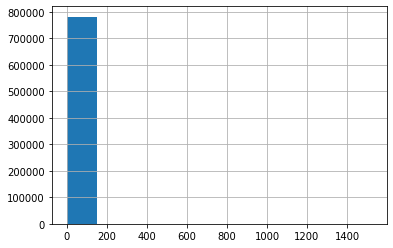

In [26]:
## Es importante evaluar la distribución donde SÍ haya asegurados!

## Eventuales urbanos:
data[data['teu'] > 0]['teu'].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


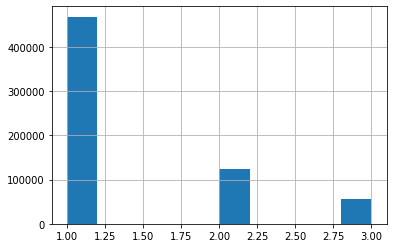

In [27]:
## Se acotan outliers con el método IQR, donde SÍ hay asegurados
def outlier(df, x):
    puestos = df[df[x] > 0][x]
    q1 = puestos.quantile(.25)
    q3 = puestos.quantile(.75)
    iqr = q3 - q1
    
    df = df[df[x] <= q3 + 1.5*iqr]
    df.reset_index(drop = True, inplace = True)
    
    global data
    data = df.copy()
    
    print(df[df[x] > 0][x].hist())

outlier(data,'teu')

<AxesSubplot:>

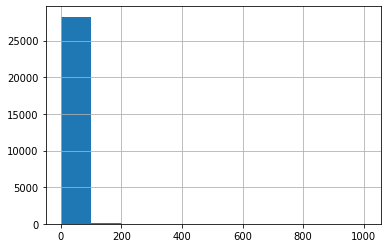

In [28]:
## Eventuales del campo:
data[data['tec'] > 0]['tec'].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


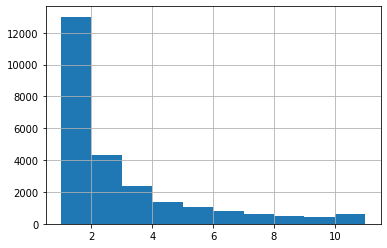

In [29]:
outlier(data,'tec')

<AxesSubplot:>

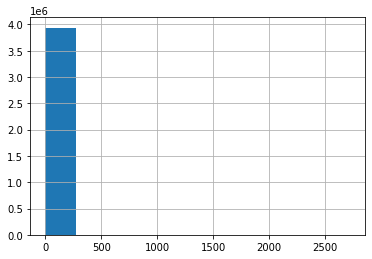

In [30]:
## Permamentes urbanos:
data[data['tpu'] > 0]['tpu'].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


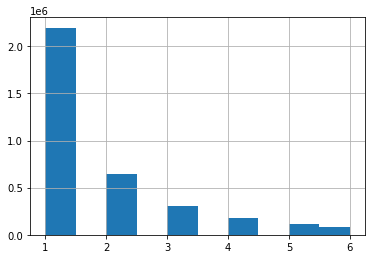

In [31]:
outlier(data,'tpu')

<AxesSubplot:>

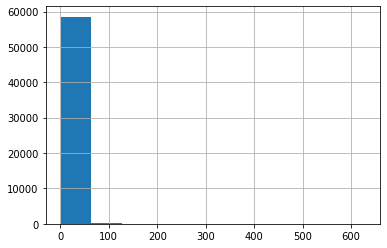

In [32]:
## Permanentes del campo:
data[data['tpc'] > 0]['tpc'].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


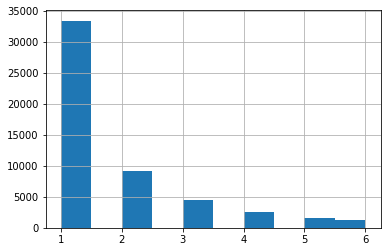

In [33]:
outlier(data,'tpc')

<AxesSubplot:>

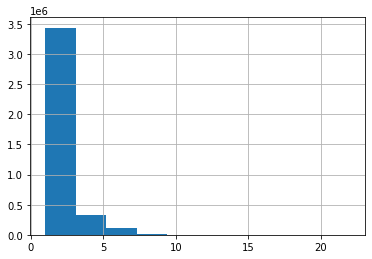

In [34]:
## Dado que la distribución de cada variable no tiene alto riesgo de outliers, 
## la suma tiene una distribución cercana a la realidad
data['ta'].hist()

In [35]:
## Y contemplamos el 87% de los registros originales
data.shape[0] / dim_antes

0.8716561928717347

#### Puestos con salario asociado

In [36]:
## Hay puestos afiliados sin salario asociado?
data['dif'] = data['ta'] - data['ta_sal']
data['dif'].value_counts()

0    3891555
1       3577
2        566
3        290
4        204
5        146
6        143
Name: dif, dtype: int64

In [37]:
## Sí, pero es menos del 0.2% de los registros
data[data['dif'] > 0].shape[0] / data.shape[0]

0.0012642176363749753

In [38]:
## De los registros con diferencia, la mayoría es de un sólo puesto
data[data['dif'] > 0]['tamaño_patron'].value_counts(normalize = True)

S1    0.732440
S3    0.089931
S4    0.083029
S5    0.037150
S2    0.030045
S6    0.021924
S7    0.005481
Name: tamaño_patron, dtype: float64

In [39]:
## Casi la mitad de los registros con diferencia pertenecen al sector comercio
data[data['dif'] > 0]['sector_economico_1'].value_counts(normalize = True)

6.0    0.467925
0.0    0.200771
8.0    0.121600
3.0    0.085871
9.0    0.050548
4.0    0.048112
7.0    0.023346
1.0    0.001218
5.0    0.000609
Name: sector_economico_1, dtype: float64

In [40]:
## Se opta por omitir los registros con puestos sin salario asociado,
## seguimos con el 87% de registros originales aún disponible
data = data[data['dif'] == 0].copy()
data.reset_index(drop = True, inplace = True)
data.shape[0] / dim_antes

0.8705542297398507

In [41]:
## Y ya no tiene caso conservar las columnas con salario asociado,
## peeeeero mejor comprobar que las variables sean iguales
data['dif_eu'] = data['teu'] - data['teu_sal']
data['dif_ec'] = data['tec'] - data['tec_sal']
data['dif_pu'] = data['tpu'] - data['tpu_sal']
data['dif_pc'] = data['tpc'] - data['tpc_sal']

data[data['dif'] == 0][['dif_eu', 'dif_ec', 'dif_pu', 'dif_pc']].value_counts()

dif_eu  dif_ec  dif_pu  dif_pc
0       0       0       0         3891555
dtype: int64

In [42]:
## Se comprueba también que ta = teu + tec + tpu + tpc en todos los registros
data['tot'] = data['ta'] - (data['teu'] + data['tec'] + data['tpu'] + data['tpc'])
data['tot'].value_counts()

0    3891555
Name: tot, dtype: int64

In [43]:
## Entonces podemos eliminar las columnas redundantes y de apoyo
aux = ['ta_sal', 'teu_sal', 'tec_sal', 'tpu_sal', 'tpc_sal',
       'dif', 'dif_eu', 'dif_ec', 'dif_pu', 'dif_pc', 'tot']

data = data.drop(columns = aux).copy()
data.columns

Index(['cve_delegacion', 'cve_subdelegacion', 'cve_entidad', 'cve_municipio',
       'sector_economico_1', 'sector_economico_2', 'sector_economico_4',
       'tamaño_patron', 'sexo', 'rango_edad', 'rango_salarial', 'rango_uma',
       'ta', 'teu', 'tec', 'tpu', 'tpc', 'masa_sal_ta', 'masa_sal_teu',
       'masa_sal_tec', 'masa_sal_tpu', 'masa_sal_tpc'],
      dtype='object')

#### Masa salarial

In [44]:
## Se comprueba también que ta = teu + tec + tpu + tpc en todos los registros
data['masa_tot'] = (data['masa_sal_ta'] - (data['masa_sal_teu'] + data['masa_sal_tec'] + data['masa_sal_tpu'] + data['masa_sal_tpc'])).round(2)
data['masa_tot'].value_counts()

0.0    3891555
Name: masa_tot, dtype: int64

In [45]:
data.drop(columns = ['masa_tot'], inplace = True)

In [46]:
data[['masa_sal_ta', 'masa_sal_teu', 'masa_sal_tec', 'masa_sal_tpu', 'masa_sal_tpc']].describe([i/10 for i in range(2,10,2)] + [.95])

,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
count,3.891555e+06,3.891555e+06,3.891555e+06,3.891555e+06,3.891555e+06
mean,8.967455e+02,9.247808e+01,3.793787e+00,7.939678e+02,6.505772e+00
std,1.105100e+03,3.261541e+02,7.242785e+01,1.056038e+03,8.049163e+01
min,1.026800e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
20%,2.477800e+02,0.000000e+00,0.000000e+00,1.567800e+02,0.000000e+00
40%,4.158900e+02,0.000000e+00,0.000000e+00,3.524400e+02,0.000000e+00
50%,5.433200e+02,0.000000e+00,0.000000e+00,4.604500e+02,0.000000e+00
60%,7.167800e+02,0.000000e+00,0.000000e+00,6.202400e+02,0.000000e+00
80%,1.294500e+03,0.000000e+00,0.000000e+00,1.183210e+03,0.000000e+00
95%,2.711820e+03,6.320530e+02,0.000000e+00,2.445710e+03,0.000000e+00


<AxesSubplot:>

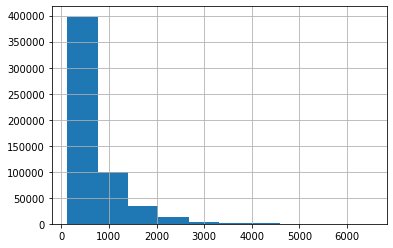

In [47]:
## Al igual que con los puestos de trabajo,
## es importante evaluar la distribución de la masa salarial
## pero donde SÍ haya asegurados!

## Eventuales urbanos:
data[data['teu'] > 0]['masa_sal_teu'].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


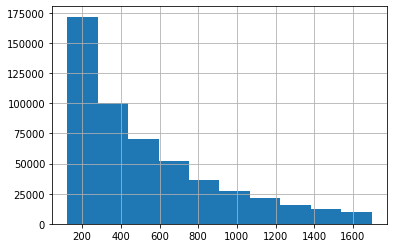

In [48]:
## Se acotan outliers con el método IQR
outlier(data,'masa_sal_teu')

<AxesSubplot:>

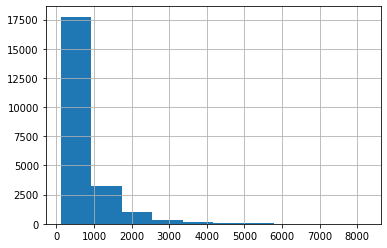

In [49]:
## Eventuales del campo:
data[data['tec'] > 0]['masa_sal_tec'].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


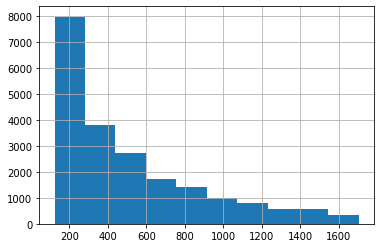

In [50]:
outlier(data,'masa_sal_tec')

<AxesSubplot:>

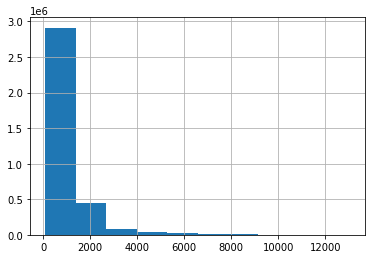

In [51]:
## Permanentes urbanos:
data[data['tpu'] > 0]['masa_sal_tpu'].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


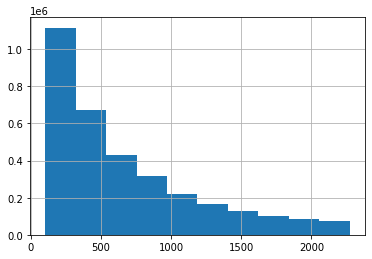

In [52]:
outlier(data,'masa_sal_tpu')

<AxesSubplot:>

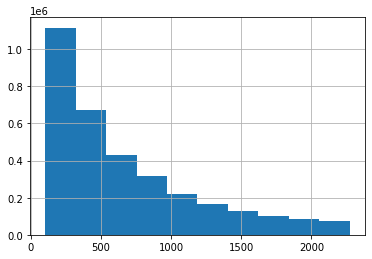

In [53]:
## Permanentes del campo:
data[data['tpu'] > 0]['masa_sal_tpu'].hist()
## parece que no tiene problemas con outliers (al fin!)

In [54]:
## Se reduce el % de registros originales a 81.5%
data.shape[0] / dim_antes

0.81490128862128

<AxesSubplot:>

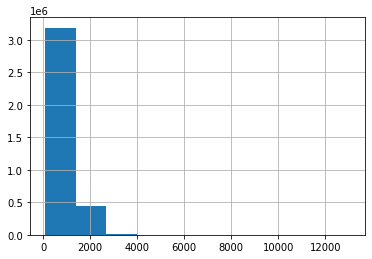

In [55]:
## Parece que la distribución de la suma total podría ser candidata a tratar con outliers, 
## sin embargo, esta variable es la suma de las otras masa asalariadas. 
## Por lo tanto, no se procede a acotar por outliers.
data[data['ta'] > 0]['masa_sal_ta'].hist()

### Catálogos

In [56]:
deleg = pd.read_excel(r'/home/ef/Documents/Diplomado/EXAMEN01/diccionario_de_datos_1.xlsx',
                      sheet_name = 2,
                      header = 1)
ent = pd.read_excel(r'/home/ef/Documents/Diplomado/EXAMEN01/diccionario_de_datos_1.xlsx',
                      sheet_name = 3,
                      header = 1)
sec1 = pd.read_excel(r'/home/ef/Documents/Diplomado/EXAMEN01/diccionario_de_datos_1.xlsx',
                      sheet_name = 4,
                      header = 1)
sec2 = pd.read_excel(r'/home/ef/Documents/Diplomado/EXAMEN01/diccionario_de_datos_1.xlsx',
                      sheet_name = 5,
                      header = 0)
sec4 = pd.read_excel(r'/home/ef/Documents/Diplomado/EXAMEN01/diccionario_de_datos_1.xlsx',
                      sheet_name = 6,
                      header = 0)
tam = pd.read_excel(r'/home/ef/Documents/Diplomado/EXAMEN01/diccionario_de_datos_1.xlsx',
                      sheet_name = 7,
                      header = 1)
edad = pd.read_excel(r'/home/ef/Documents/Diplomado/EXAMEN01/diccionario_de_datos_1.xlsx',
                      sheet_name = 9,
                      header = 1)
salario = pd.read_excel(r'/home/ef/Documents/Diplomado/EXAMEN01/diccionario_de_datos_1.xlsx',
                      sheet_name = 10,
                      header = 1)
uma = pd.read_excel(r'/home/ef/Documents/Diplomado/EXAMEN01/diccionario_de_datos_1.xlsx',
                      sheet_name = 11,
                      header = 1)

#### Delegación y subdelegación

In [57]:
 ## El último renglón no es un registro (también ocurre en la variable de rango salario)
deleg[deleg['descripcion delegación'].isnull()]

,ID_DELEG_RP,descripcion delegación,ID_SUBDEL_RP,descripcion subdelegación
133,*Actualizado con base en el Reglamento Interio...,NaN,NaN,NaN


In [58]:
deleg.dropna(inplace = True)
salario.dropna(inplace = True)
deleg['ID_SUBDEL_RP'] = deleg['ID_SUBDEL_RP'].astype(int)
deleg.sample(4)

,ID_DELEG_RP,descripcion delegación,ID_SUBDEL_RP,descripcion subdelegación
64,19,Nayarit,1,Tepic
81,23,Querétaro,3,San Juan del Río
78,22,Puebla,8,Izúcar de Matamoros
105,29,Tamaulipas,10,Tampico


In [59]:
## Separar catálogo de subdelegación, el ID de subdeleg depende de la deleg
## Comprobar que no haya duplicados
subdeleg = deleg [['ID_DELEG_RP', 'ID_SUBDEL_RP','descripcion subdelegación']].copy()
subdeleg[['ID_DELEG_RP', 'ID_SUBDEL_RP']].value_counts()

ID_DELEG_RP  ID_SUBDEL_RP
40           58              1
14           39              1
11           14              1
             17              1
12           1               1
                            ..
27           1               1
             3               1
             7               1
             10              1
1            1               1
Length: 133, dtype: int64

In [60]:
## Se crea el verdadero ID de subdelegación, sin duplicados
subdeleg['ID_SUBDELEG'] = subdeleg.ID_DELEG_RP.astype(str).str.zfill(2) + "_" + subdeleg.ID_SUBDEL_RP.astype(str).str.zfill(2)
subdeleg['ID_SUBDELEG'].value_counts()

27_70    1
26_01    1
29_01    1
12_01    1
08_22    1
        ..
27_13    1
31_07    1
25_60    1
17_03    1
32_02    1
Name: ID_SUBDELEG, Length: 133, dtype: int64

In [61]:
## Ahora se cuenta con la tabla catálogo de subdelegación
subdeleg.rename(columns = {'ID_SUBDELEG':'cve_subdelegacion', 'descripcion subdelegación':'Sub'},
               inplace = True)
subdeleg = subdeleg[['cve_subdelegacion','Sub']].copy()
subdeleg.sample(4)

,cve_subdelegacion,Sub
36,12_01,Chilpancingo
39,12_13,Zihuatanejo
90,26_03,Los Mochis
120,33_33,Mérida Sur


In [62]:
## Comprobar que deleg no tenga duplicados en ID o en descripcion
deleg = deleg[['ID_DELEG_RP', 'descripcion delegación']].copy()
deleg.rename(columns = {'ID_DELEG_RP':'cve_delegacion', 'descripcion delegación':'Del'},
               inplace = True)
deleg.drop_duplicates(inplace = True, ignore_index = True)
deleg['cve_delegacion'].value_counts().head(4)

40    1
10    1
16    1
15    1
Name: cve_delegacion, dtype: int64

In [63]:
## Todo en orden, estos catálogos ya están definidos correctamente
deleg['Del'].value_counts().head(4)

Tamaulipas             1
Baja California Sur    1
Tlaxcala               1
Chihuahua              1
Name: Del, dtype: int64

In [64]:
deleg.sample(4)

,cve_delegacion,Del
14,16,Estado de México Poniente
6,7,Chiapas
8,10,Durango
5,6,Colima


#### Entidad y municipio

In [65]:
## Un tratamiento similar al catálogo anterior es buena idea
ent.sample(4)

,cve_municipio,cve_delegacion,cve_entidad,descripción entidad,descripción municipio
1293,M06,21,20,Oaxaca,San Agustín Atenango
230,L62,8,8,Chihuahua,López
293,B23,39,9,Ciudad de México,NaN
2075,Q05,28,27,Tabasco,Emiliano Zapata


In [66]:
## Separar catálogo de entidad y municipio
munic = ent[['cve_municipio', 'descripción municipio']].copy()

## Hay claves de municipio sin nombre, pertenecen a CDMX
## (aporta algo que haya claves pero no nombres? No existen registros con las claves de CDMX)
munic['descripción municipio'].isnull().sum() / munic.shape[0]

0.033984375

In [67]:
## Ya no hay claves repetidas ni vacías (excepto por "Y44"!!!)
munic.dropna(inplace = True)
munic.reset_index(drop = True, inplace = True)
munic['cve_municipio'].value_counts().head(4)

Y44    2
K70    1
I35    1
X87    1
Name: cve_municipio, dtype: int64

In [68]:
## Podemos guiarnos con la clave de entidad, generando una llave de dos variables
ent[ent['cve_municipio'] == "Y44" ]

,cve_municipio,cve_delegacion,cve_entidad,descripción entidad,descripción municipio
1878,Y44,22,21,Puebla,Puebla
2058,Y44,27,26,Sonora,General Plutarco Elías Calles


In [69]:
## De nuevo se crea el dataframe de municipio pero ahora con clave de entidad
munic = ent[['cve_entidad', 'cve_municipio', 'descripción municipio']].copy()
## Se omiten las claves vacías
munic.dropna(inplace = True)
munic.reset_index(drop = True, inplace = True)

## Y ahora se crea la llave, ya no hay duplicados
munic['cve_municipio'] = munic.cve_entidad.astype(str).str.zfill(2) + "_" + munic.cve_municipio
munic['cve_municipio'].value_counts().head(4)

31_G73    1
20_I88    1
14_B84    1
32_H01    1
Name: cve_municipio, dtype: int64

In [70]:
## Listo, pero falta un pequeño paso
munic.rename(columns = {'descripción municipio':'Munic'}, inplace = True)
munic = munic[['cve_municipio', 'Munic']].copy()
munic.sample(4)

,cve_municipio,Munic
279,10_B32,Mapimí
156,07_M81,Berriozábal
2407,31_Y24,Chankom
2263,30_Q39,Soconusco


Dado que en nuestro conjunto de datos reemplazamos los registros vacíos en la clave de municipio por "MEX" ya que según el documento de preguntas frecuentes esto significa que pertenecen a CDMX. Y además, dado en nuestro catálogo eliminamos los registros vacíos, tendríamos que crear un registro con la clave de entidad 9 (perteneciente a CDMX) y la clave de municipio "MEX" para traer el nombre "CDMX".

In [71]:
## Ahora sí, tenemos completo el catálogo de municipios 
falta_cdmx = {'cve_municipio':'09_MEX', 'Munic':'CDMX'}
munic = munic.append(falta_cdmx, ignore_index=True).copy()
munic[munic['cve_municipio'] == '09_MEX']

,cve_municipio,Munic
2473,09_MEX,CDMX


In [72]:
ent.columns

Index(['cve_municipio', 'cve_delegacion', 'cve_entidad', 'descripción entidad',
       'descripción municipio'],
      dtype='object')

In [73]:
## Comprobar que entidad no tenga duplicados en clave o en descripcion
ent = ent[['cve_entidad', 'descripción entidad']].copy()
ent.rename(columns = {'descripción entidad':'Ent'},
               inplace = True)
ent.drop_duplicates(inplace = True, ignore_index = True)
ent['cve_entidad'].value_counts().head(4)

32    1
31    1
2     1
3     1
Name: cve_entidad, dtype: int64

In [74]:
## Todo en orden, estos catálogos ya están definidos correctamente
ent['Ent'].value_counts().head(4)

Tamaulipas             1
Puebla                 1
Durango                1
Michoacán de Ocampo    1
Name: Ent, dtype: int64

In [75]:
ent.sample(4)

,cve_entidad,Ent
8,9,Ciudad de México
6,7,Chiapas
1,2,Baja California
7,8,Chihuahua


#### Sectores

In [76]:
sec1.rename(columns = {'descripción sector_economico_1':'Sector1'}, inplace = True)
sec1

,sector_economico_1,Sector1
0,0,"Agricultura, ganadería, silvicultura, pesca y ..."
1,1,Industrias extractivas
2,3,Industrias de transformación
3,4,Industria de la construcción
4,5,"Industria eléctrica, y captación y suministro ..."
5,6,Comercio
6,7,Transportes y comunicaciones
7,8,"Servicios para empresas, personas y el hogar"
8,9,Servicios sociales y comunales


In [77]:
sec2.sample(4)

,sector_economico_1,sector_economico_2,sector_economico_2_2pos,descripción sector_economico_2
40,6,8,68,Compraventa de equipo de transporte; sus refac...
19,3,0,30,Industria química
16,2,7,27,Fabricación y reparación de muebles de madera ...
33,6,1,61,"Compraventa de alimentos, bebidas y productos ..."


In [78]:
sec2['sector_economico_2'] = sec2['sector_economico_2_2pos']
sec2.rename(columns = {'descripción sector_economico_2':'Sector2'}, inplace = True)
sec2 = sec2[['sector_economico_2', 'Sector2']].copy()
sec2.sample(4)

,sector_economico_2,Sector2
52,85,Servicios de alquiler; excepto de inmuebles ...
16,27,Fabricación y reparación de muebles de madera ...
61,99,Servicios de organizaciones internacionales y ...
0,1,Agricultura


In [79]:
sec4.sample(4)

,sector_economico_1,sector_economico_2,sector_economico_2_2pos,sector_economico_4,sector_economico_4_4_pos,descripción sector_economico_4
117,3,7,37,4,3704,Fabricación y/o ensamble de aparatos eléctrico...
141,3,9,39,6,3906,"Fabricación de lápices, gomas, plumas y bolígr..."
6,0,4,4,4,404,Trabajos de buceo
235,8,4,84,5,8405,Servicios de laboratorio para la industria en ...


In [80]:
sec4.columns

Index(['sector_economico_1', 'sector_economico_2', 'sector_economico_2_2pos',
       'sector_economico_4', 'sector_economico_4_4_pos',
       'descripción sector_economico_4'],
      dtype='object')

In [81]:
sec4['sector_economico_4'] = sec4['sector_economico_4_4_pos']
sec4.rename(columns = {'descripción sector_economico_4':'Sector4'}, inplace = True)
sec4 = sec4[['sector_economico_4', 'Sector4']].copy()
sec4.sample(4)

,sector_economico_4,Sector4
82,3303,Fabricación de vidrio y/o productos de vidrio
226,7504,"Servicios de alquiler de aeronaves, carros de ..."
56,2604,"Fabricación de artículos de corcho, palma, var..."
273,9402,Seguridad pública


#### Tamaño del registro patronal

In [82]:
## El catalogo está en minúsculas, caso contraro en el conjunto de datos
tam['tamaño_patron'] = tam.tamaño_patron.str.upper()

In [83]:
tam['tamaño_patron'].value_counts()

S3    1
S2    1
S6    1
S1    1
S4    1
S5    1
S7    1
Name: tamaño_patron, dtype: int64

Para sexo no hace falta un catálogo, y el resto parece no tener temas de limpieza.
Es buena idea convertirlos a diccionario para poder reemplazarlo en nuestro conjunto de datos.

### Unir con registros

#### Diccionarios

In [84]:
tam = tam.set_index('tamaño_patron').T.to_dict('list')
tam

{'S1': ['Con un puesto de trabajo'],
 'S2': ['con 2 y hasta 5 puestos de trabajo'],
 'S3': ['con 6 y hasta 50 puestos de trabajo'],
 'S4': ['con 51 y hasta 250 puestos de trabajo'],
 'S5': ['con 251 y hasta 500 puestos de trabajo'],
 'S6': ['con 501 y hasta 1,000 puestos de trabajo'],
 'S7': ['con más de 1,000 puestos de trabajo'],
 nan: ['No aplica']}

In [85]:
deleg = deleg.set_index('cve_delegacion').T.to_dict('list')
subdeleg = subdeleg.set_index('cve_subdelegacion').T.to_dict('list')
ent = ent.set_index('cve_entidad').T.to_dict('list')
munic = munic.set_index('cve_municipio').T.to_dict('list')

sec1 = sec1.set_index('sector_economico_1').T.to_dict('list')
sec2 = sec2.set_index('sector_economico_2').T.to_dict('list')
sec4 = sec4.set_index('sector_economico_4').T.to_dict('list')

edad = edad.set_index('rango_edad').T.to_dict('list')
salario = salario.set_index('rango_salarial').T.to_dict('list')
uma = uma.set_index('rango_salarial').T.to_dict('list')

sec1

{0: ['Agricultura, ganadería, silvicultura, pesca y caza'],
 1: ['Industrias extractivas'],
 3: ['Industrias de transformación'],
 4: ['Industria de la construcción'],
 5: ['Industria eléctrica, y captación y suministro de agua potable'],
 6: ['Comercio'],
 7: ['Transportes y comunicaciones'],
 8: ['Servicios para empresas, personas y el hogar'],
 9: ['Servicios sociales y comunales']}

In [86]:
sexo = {1:'Hombre', 2:'Mujer'}

#### Crear llaves

In [87]:
data.iloc[:, 0:10].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642775 entries, 0 to 3642774
Data columns (total 10 columns):
 #   Column              Dtype  
---  ------              -----  
 0   cve_delegacion      int64  
 1   cve_subdelegacion   int64  
 2   cve_entidad         int64  
 3   cve_municipio       object 
 4   sector_economico_1  float64
 5   sector_economico_2  float64
 6   sector_economico_4  float64
 7   tamaño_patron       object 
 8   sexo                int64  
 9   rango_edad          object 
dtypes: float64(3), int64(4), object(3)
memory usage: 277.9+ MB


In [88]:
## Clave subdelegación es la unión a dos dígitos de las primeras dos columnas
data['cve_subdelegacion'] = data.cve_delegacion.astype(str).str.zfill(2) + "_" + data.cve_subdelegacion.astype(str).str.zfill(2)
data['cve_subdelegacion'].sample(4)

3035838    31_07
249974     04_01
3010587    31_02
1786386    18_11
Name: cve_subdelegacion, dtype: object

In [89]:
## Clave municipio es la unión a dos dígitos de la entidad junto con el código de municipio
data['cve_municipio'] = data.cve_entidad.astype(str).str.zfill(2) + "_" + data.cve_municipio
data['cve_municipio'].sample(4)

1720769    16_D08
2538398    24_E41
2860124    28_F05
3480967    09_MEX
Name: cve_municipio, dtype: object

#### Unión

In [90]:
## Se intercambian las llaves por el valor correspondiente

data['cve_delegacion'] = [deleg[x] for x in data['cve_delegacion']]
data['cve_subdelegacion'] = [subdeleg[x] for x in data['cve_subdelegacion']]
data['cve_entidad'] = [ent[x] for x in data['cve_entidad']]
data['cve_municipio'] = [munic[x] for x in data['cve_municipio']]

data['sector_economico_1'] = [sec1[x] for x in data['sector_economico_1']]
data['sector_economico_2'] = [sec2[x] for x in data['sector_economico_2']]
data['sector_economico_4'] = [sec4[x] for x in data['sector_economico_4']]

data['tamaño_patron'] = [tam[x] for x in data['tamaño_patron']]
data['sexo'] = [sexo[x] for x in data['sexo']]
data['rango_edad'] = [edad[x] for x in data['rango_edad']]
data['rango_salarial'] = [salario[x] for x in data['rango_salarial']]
data['rango_uma'] = [uma[x] for x in data['rango_uma']]

data.iloc[:, 0:12].sample(4)

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,rango_salarial,rango_uma
1532671,[Estado de México Poniente],[Toluca],[Estado México],[Metepec],"[Servicios para empresas, personas y el hogar]",[Servicios profesionales y técnicos ...,[Servicios de instalación de maquinaria y equi...,[con 6 y hasta 50 puestos de trabajo],Hombre,[Mayor o igual a 55 y menor a 60 años de edad],[ mayor a 1 y hasta 2 veces el salario mínimo],[ mayor a 2 y hasta 3 veces la UMA]
1877121,[Nuevo León],[Apodaca],[Nuevo León],[Guadalupe],[Comercio],"[Compraventa de alimentos, bebidas y productos...","[Compraventa de alimentos, bebidas y/o product...",[con 2 y hasta 5 puestos de trabajo],Hombre,[Mayor o igual a 50 y menor a 55 años de edad],[ mayor a 1 y hasta 2 veces el salario mínimo],[ mayor a 2 y hasta 3 veces la UMA]
263952,[Campeche],[Ciudad del Carmen],[Campeche],[Carmen],"[Servicios para empresas, personas y el hogar]",[Servicios de alojamiento temporal ...,[Servicios de alojamiento temporal],[con 6 y hasta 50 puestos de trabajo],Hombre,[Mayor o igual a 30 y menor a 35 años de edad],[ mayor a 6 y hasta 7 veces el salario mínimo],[ mayor a 9 y hasta 10 veces la UMA]
566027,[Chihuahua],[Juárez 1],[Chihuahua],[Juárez],[Industrias de transformación],[Fabricación de productos metálicos; excepto m...,"[Fabricación y/o reparación de puertas, ventan...",[con 251 y hasta 500 puestos de trabajo],Hombre,[Mayor o igual a 30 y menor a 35 años de edad],[ mayor a 7 y hasta 8 veces el salario mínimo],[ mayor a 11 y hasta 12 veces la UMA]


In [91]:
## Y nada se descompuso (al parecer), no hay vacíos
data.isnull().sum() / data.shape[0]

cve_delegacion        0.0
cve_subdelegacion     0.0
cve_entidad           0.0
cve_municipio         0.0
sector_economico_1    0.0
sector_economico_2    0.0
sector_economico_4    0.0
tamaño_patron         0.0
sexo                  0.0
rango_edad            0.0
rango_salarial        0.0
rango_uma             0.0
ta                    0.0
teu                   0.0
tec                   0.0
tpu                   0.0
tpc                   0.0
masa_sal_ta           0.0
masa_sal_teu          0.0
masa_sal_tec          0.0
masa_sal_tpu          0.0
masa_sal_tpc          0.0
dtype: float64

In [92]:
## Pero por venir de diccionario, las variables de dimensión tienen formato incorrecto, 
## Se omiten los caracteres ['']
for i in data.iloc[:,0:12].columns:
    data[i] = [str(x).strip('[\']') for x in data[i]]
  
data.sample(4)

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,...,ta,teu,tec,tpu,tpc,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
3126458,Veracruz Sur,Cosamaloapan,Veracruz de Ignacio de la Llave,Cosamaloapan de Carpio,"Industria eléctrica, y captación y suministro ...","Generación, transmisión y distribución de ener...","Generación, transmisión y distribución de ener...",con 251 y hasta 500 puestos de trabajo,Hombre,Mayor o igual a 50 y menor a 55 años de edad,...,1,1,0,0,0,614.30,614.30,0.0,0.00,0.0
2469452,Quintana Roo,Playa del Carmen,Quintana Roo,Solidaridad,Industrias de transformación,Fabricación de productos de hule y plástico,Fabricación de productos de plástico,con 6 y hasta 50 puestos de trabajo,Hombre,Mayor o igual a 35 y menor a 40 años de edad,...,2,0,0,2,0,440.14,0.00,0.0,440.14,0.0
2517447,San Luis Potosí,Oriente,San Luis Potosí,San Luis Potosí,Industrias de transformación,Fabricación de productos de minerales no metál...,Fabricación de productos abrasivos,con 51 y hasta 250 puestos de trabajo,Hombre,Mayor o igual a 40 y menor a 45 años de edad,...,1,0,0,1,0,1116.70,0.00,0.0,1116.70,0.0
814700,Guanajuato,León,Guanajuato,Silao de la Victoria,Transportes y comunicaciones,Transporte terrestre ...,Transporte de carga,con 51 y hasta 250 puestos de trabajo,Mujer,Mayor o igual a 35 y menor a 40 años de edad,...,5,1,0,4,0,1097.96,238.38,0.0,859.58,0.0


## Ingeniería de variables

### Salario base

In [93]:
## Se puede calcular el salario base de cotización, es decir, 
## el promedio de lo que gana un trabajador al día, en éste se basan sus prestaciones
data['base_ta'] = data['masa_sal_ta'] / data['ta']
data['base_teu'] = data['masa_sal_teu'] / data['teu']
data['base_tec'] = data['masa_sal_tec'] / data['tec']
data['base_tpu'] = data['masa_sal_tpu'] / data['tpu']
data['base_tpc'] = data['masa_sal_tpc'] / data['tpc']

data[['base_ta', 'base_teu', 'base_tec', 'base_tpu', 'base_tpc']].sample(4)

,base_ta,base_teu,base_tec,base_tpu,base_tpc
2820566,145.83,NaN,NaN,145.83,NaN
2021863,1212.39,NaN,NaN,1212.39,NaN
1299803,253.30,NaN,NaN,253.30,NaN
345343,549.15,NaN,NaN,549.15,NaN


In [94]:
## Los valores vacíos (cero entre cero) en realidad son cero, pero hay que ser cuidadosos
## con estas variables para no sesgar operaciones o modelos futuros
data.fillna(0, inplace = True)

data[['base_ta', 'base_teu', 'base_tec', 'base_tpu', 'base_tpc']].sample(4)

,base_ta,base_teu,base_tec,base_tpu,base_tpc
701412,230.754,0.0,0.0,230.754,0.0
3551190,1514.490,0.0,0.0,1514.490,0.0
1221102,534.210,0.0,0.0,534.210,0.0
3266358,167.230,0.0,0.0,167.230,0.0


<AxesSubplot:>

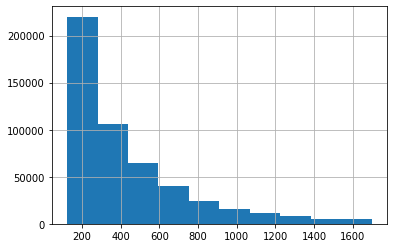

In [95]:
## Aún existen outliers para la tarifa base de cotización de algunos tipos de tarifa
## Eventuales urbanos está ok
data[data['teu'] > 0]['base_teu'].hist()

<AxesSubplot:>

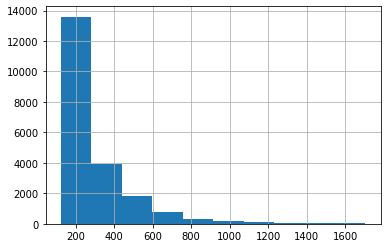

In [96]:
## Pero el resto no tanto (jeje)
data[data['tec'] > 0]['base_tec'].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


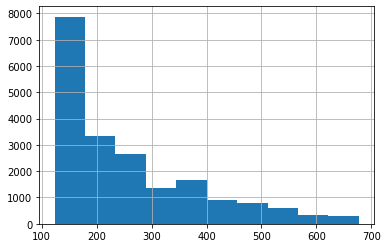

In [97]:
outlier(data,'base_tec')

<AxesSubplot:>

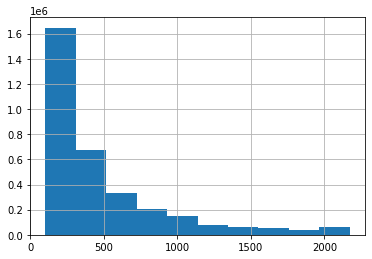

In [98]:
data[data['tpu'] > 0]['base_tpu'].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


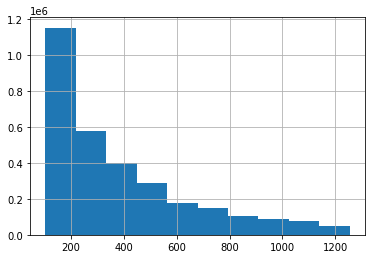

In [99]:
outlier(data,'base_tpu')

<AxesSubplot:>

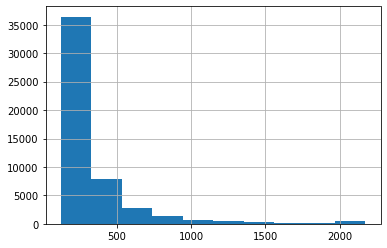

In [100]:
data[data['tpc'] > 0]['base_tpc'].hist()

AxesSubplot(0.125,0.125;0.775x0.755)


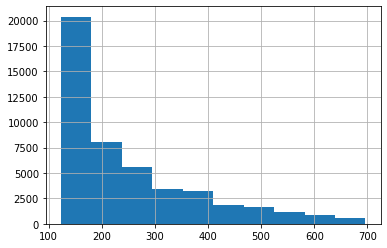

In [101]:
outlier(data,'base_tpc')

In [102]:
## Se reduce el % de registros originales a %
data.shape[0] / dim_antes

0.7578938231901721

### Cambio de estructura

In [104]:
## Se quiere evaluar la tarifa base por cotización por tipo y tiempo de puesto 
## Mantenemos todas las columnas de dimensión

colum = data.iloc[:,0:12].columns

## Guardamos sólo las variables con tarifa base de cotización
tarifa = [col for col in data.columns if col.startswith('base')][1:]

## Cambiamos la forma de la tabla
ajustada = pd.melt(data,
                   id_vars = colum,
                   value_vars = tarifa,
                   var_name = "Tipo",
                   value_name = "Tarifa_base")

## Eliminamos las tarifas base de cotización igual a cero, no hay asegurados de ese tipo
ajustada = ajustada[ajustada['Tarifa_base'] > 0].copy()
ajustada.reset_index(drop = True, inplace = True)
ajustada.sample(4)

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,rango_salarial,rango_uma,Tipo,Tarifa_base
2342964,Oaxaca,Oaxaca,Oaxaca,Oaxaca de Juárez,Industrias de transformación,Fabricación de alimentos,Elaboración y preparación de productos aliment...,con 6 y hasta 50 puestos de trabajo,Hombre,Mayor o igual a 30 y menor a 35 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,mayor a 1 y hasta 2 veces la UMA,base_tpu,134.395000
2006844,Morelos,Cuernavaca,Morelos,Jiutepec,Industrias de transformación,Fabricación de alimentos,"Elaboración, preparación, envasado y/o empacad...",con 251 y hasta 500 puestos de trabajo,Mujer,Mayor o igual a 40 y menor a 45 años de edad,mayor a 4 y hasta 5 veces el salario mínimo,mayor a 5 y hasta 6 veces la UMA,base_tpu,501.360000
3570905,Aguascalientes,Aguascalientes Norte,Aguascalientes,Aguascalientes,"Agricultura, ganadería, silvicultura, pesca y ...",Ganadería,Cría y explotación de ganado y otras clases de...,con 2 y hasta 5 puestos de trabajo,Hombre,Mayor o igual a 25 y menor a 30 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,mayor a 1 y hasta 2 veces la UMA,base_tpc,138.363333
3575515,Coahuila,Torreón,Coahuila de Zaragoza,Viesca,"Agricultura, ganadería, silvicultura, pesca y ...",Agricultura,Agricultura,"con más de 1,000 puestos de trabajo",Hombre,Mayor o igual a 30 y menor a 35 años de edad,mayor a 4 y hasta 5 veces el salario mínimo,mayor a 6 y hasta 7 veces la UMA,base_tpc,582.960000


In [106]:
## Si queremos conocer la cantidad de puestos, se procede con un truquito
ajustada['Tipo'] = [x.strip('base_') for x in ajustada['Tipo']]
ajustada['Tipo'].sample(4)

1124036    tpu
2386900    tpu
1551391    tpu
3070218    tpu
Name: Tipo, dtype: object

In [107]:
## Guardamos sólo las variables con cantidad de asegurados
asegurados = [col for col in data.columns if col.startswith('t')][2:6]

## Cambiamos la forma de la tabla, con misma tabla datailiar y mismas columnas
ajustada2 = pd.melt(data,
                   id_vars = colum,
                   value_vars = asegurados,
                   var_name = "Tipo",
                   value_name = "Asegurados")

## Eliminamos las tarifas base de cotización igual a cero, no hay asegurados de ese tipo
ajustada2 = ajustada2[ajustada2['Asegurados'] > 0].copy()
ajustada2.reset_index(drop = True, inplace = True)
ajustada2.sample(4)

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,rango_salarial,rango_uma,Tipo,Asegurados
1390694,Jalisco,Hidalgo,Jalisco,Zapopan,Comercio,"Compraventa de alimentos, bebidas y productos ...","Compraventa de alimentos, bebidas y/o producto...",con 51 y hasta 250 puestos de trabajo,Hombre,Mayor o igual a 35 y menor a 40 años de edad,mayor a 8 y hasta 9 veces el salario mínimo,mayor a 12 y hasta 13 veces la UMA,tpu,2
859976,Colima,Colima,Colima,Colima,"Servicios para empresas, personas y el hogar",Servicios recreativos y de esparcimiento ...,Servicios recreativos,con 6 y hasta 50 puestos de trabajo,Hombre,Mayor o igual a 30 y menor a 35 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,mayor a 1 y hasta 2 veces la UMA,tpu,3
467541,Ciudad de México Sur,San Ángel,Ciudad de México,CDMX,Industrias de transformación,Otras industrias manufactureras ...,"Fabricación, ensamble y/o reparación de equipo...",con 51 y hasta 250 puestos de trabajo,Mujer,Mayor o igual a 30 y menor a 35 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,mayor a 2 y hasta 3 veces la UMA,teu,2
1497133,Jalisco,Libertad Reforma,Jalisco,Tonalá,Industrias de transformación,Fabricación de alimentos,Elaboración de productos a base de cereales,con 51 y hasta 250 puestos de trabajo,Mujer,Mayor o igual a 15 y menor a 20 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,mayor a 1 y hasta 2 veces la UMA,tpu,3


In [108]:
## Unimos las dos tablas (con el truquito de cambiar nombres, así "creamos" la llave)
## para tener cantidad de asegurados y tarifa base en la misma estructura
ajustada = pd.merge(ajustada, ajustada2,
        on = list(ajustada.iloc[:,:-1].columns),
        how = 'outer')

## Incluso podemos calcular la masa salarial
ajustada['Masa'] = ajustada['Tarifa_base'] * ajustada['Asegurados']

ajustada.sample(4)

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tamaño_patron,sexo,rango_edad,rango_salarial,rango_uma,Tipo,Tarifa_base,Asegurados,Masa
494189,Ciudad de México Sur,Churubusco,Ciudad de México,CDMX,"Servicios para empresas, personas y el hogar",Servicios colaterales a las instituciones fina...,Servicios colaterales a las instituciones fina...,con 6 y hasta 50 puestos de trabajo,Mujer,Mayor o igual a 35 y menor a 40 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,mayor a 1 y hasta 2 veces la UMA,teu,128.79,1,128.79
2292835,Nuevo León,Noreste,Nuevo León,Monterrey,"Servicios para empresas, personas y el hogar",Servicios profesionales y técnicos ...,Servicios de protección y custodia,con 51 y hasta 250 puestos de trabajo,Hombre,Mayor o igual a 25 y menor a 30 años de edad,mayor a 5 y hasta 6 veces el salario mínimo,mayor a 8 y hasta 9 veces la UMA,tpu,739.12,1,739.12
1809749,Estado de México Oriente,Tlanepantla de Baz,Estado México,Cuautitlán Izcalli,Transportes y comunicaciones,Servicios relacionados con el transporte en ge...,Servicios de almacenamiento y/o refrigeración,con 251 y hasta 500 puestos de trabajo,Hombre,Mayor o igual a 25 y menor a 30 años de edad,mayor a 6 y hasta 7 veces el salario mínimo,mayor a 8 y hasta 9 veces la UMA,tpu,753.40,3,2260.20
1640478,Jalisco,Juárez,Jalisco,Guadalajara,"Servicios para empresas, personas y el hogar",Preparación y servicio de alimentos y bebidas ...,Preparación y servicio de alimentos,con 2 y hasta 5 puestos de trabajo,Mujer,Mayor o igual a 55 y menor a 60 años de edad,mayor a 1 y hasta 2 veces el salario mínimo,mayor a 1 y hasta 2 veces la UMA,tpu,148.41,2,296.82


In [109]:
## La columna Tipo puede separarse en dos para distinguir si el puesto es:
## permanente o eventual y urbano o del campo
ajustada['Tipo'] = [x.strip('t') for x in ajustada['Tipo']]

aux1 = []
aux2 = []
for x in ajustada['Tipo']:
    if x.startswith('e'):
        aux1.append('Eventual')
        if x.endswith('u'):
            aux2.append('Urbano')
        else:
            aux2.append('Campo')
    else:
        aux1.append('Permanente')
        if x.endswith('u'):
            aux2.append('Urbano')
        else:
            aux2.append('Campo')

ajustada['Tiempo'] = aux1
ajustada['Tipo'] = aux2

ajustada['Tipo_tiempo'] = ajustada['Tipo'] + "-" + ajustada['Tiempo']

ajustada['Tipo_tiempo'].value_counts(normalize = True)       

Urbano-Permanente    0.850878
Urbano-Eventual      0.131482
Campo-Permanente     0.012431
Campo-Eventual       0.005209
Name: Tipo_tiempo, dtype: float64

## Inteligencia de negocio

### Heatmap

In [110]:
## ¿Qué tan alta es la tarifa base de cotización entre estados y sectores?
heat = ajustada.groupby(['cve_entidad', 'sector_economico_1']).agg({'Tarifa_base':'mean'}).copy()
heat

Tarifa_base
cve_entidad    sector_economico_1                                             
Aguascalientes Agricultura, ganadería, silvicultura, pesca y caza   247.348498
               Comercio                                             337.016855
               Industria de la construcción                         313.391100
               Industria eléctrica, y captación y suministro d...   720.312682
               Industrias de transformación                         382.539198
...                                                                        ...
Zacatecas      Industrias de transformación                         313.099960
               Industrias extractivas                               560.078517
               Servicios para empresas, personas y el hogar         280.366772
               Servicios sociales y comunales                       395.634246
               Transportes y comunicaciones                         293.371963

[288 rows x 1 columns]

<AxesSubplot:xlabel='None-cve_entidad', ylabel='sector_economico_1'>

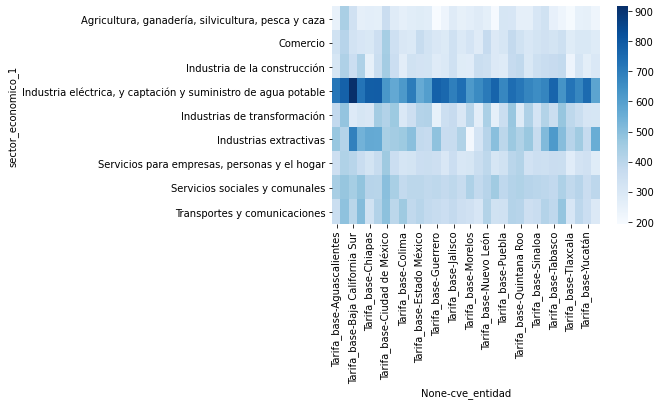

In [111]:
heat = heat.pivot_table(index = 'sector_economico_1',
                columns = 'cve_entidad').copy()

sns.heatmap(heat,
            cmap = 'Blues')

<AxesSubplot:xlabel='None-cve_entidad', ylabel='sector_economico_1'>

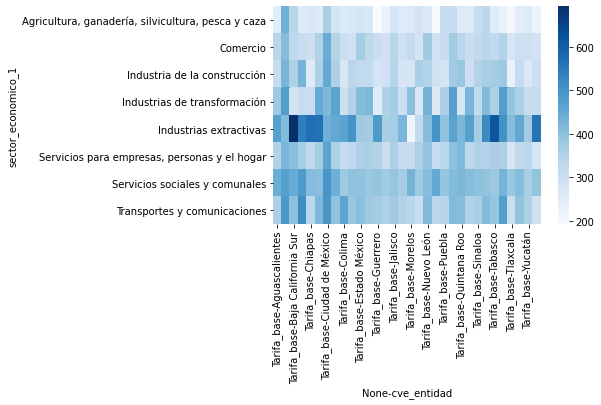

In [112]:
## Si omitimos la industria eléctrica por ser tan alta?
heat = ajustada[ajustada['sector_economico_1'] != 'Industria eléctrica, y captación y suministro de agua potable'].groupby(['cve_entidad', 'sector_economico_1']).agg({'Tarifa_base':'mean'}).copy()
heat = heat.pivot_table(index = 'sector_economico_1',
                columns = 'cve_entidad').copy()
sns.heatmap(heat,
            cmap = 'Blues')

### Brecha salarial 

In [113]:
## Tarifa base de cotización por sexo vs edad en sector servicios para el hogar

##Primero, hay que convertir a numéricas las categorías de la edad
aux = pd.DataFrame(ajustada['rango_edad'].value_counts().sort_index())
aux.reset_index(inplace = True)
aux

,index,rango_edad
0,75 o más años de edad,16162
1,Mayor o igual a 15 y menor a 20 años de edad,94830
2,Mayor o igual a 20 y menor a 25 años de edad,299868
3,Mayor o igual a 25 y menor a 30 años de edad,470402
4,Mayor o igual a 30 y menor a 35 años de edad,516099
5,Mayor o igual a 35 y menor a 40 años de edad,507026
6,Mayor o igual a 40 y menor a 45 años de edad,477653
7,Mayor o igual a 45 y menor a 50 años de edad,452838
8,Mayor o igual a 50 y menor a 55 años de edad,387967
9,Mayor o igual a 55 y menor a 60 años de edad,324563


In [114]:
aux['strip'] = [x.strip('Mayor o igual años de edad') for x in aux['index']]
aux.sample(4)

,index,rango_edad,strip
12,Mayor o igual a 70 y menor a 75 años de edad,27297,70 y menor a 75
5,Mayor o igual a 35 y menor a 40 años de edad,507026,35 y menor a 40
1,Mayor o igual a 15 y menor a 20 años de edad,94830,15 y menor a 20
9,Mayor o igual a 55 y menor a 60 años de edad,324563,55 y menor a 60


In [115]:
aux['ini'] = [x[:2] for x in aux['strip']]
aux['fin'] = [x[13:] for x in aux['strip']]

aux['ini'][13] = 0
aux['fin'][0] = 90
aux['fin'][13] = 15
aux = aux[['index', 'ini', 'fin']].copy()
aux.rename(columns = {'index':'rango_edad'}, inplace = True)
aux

<ipython-input-115-c78234cafe6f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['ini'][13] = 0
<ipython-input-115-c78234cafe6f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['fin'][0] = 90
<ipython-input-115-c78234cafe6f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aux['fin'][13] = 15


,rango_edad,ini,fin
0,75 o más años de edad,75,90
1,Mayor o igual a 15 y menor a 20 años de edad,15,20
2,Mayor o igual a 20 y menor a 25 años de edad,20,25
3,Mayor o igual a 25 y menor a 30 años de edad,25,30
4,Mayor o igual a 30 y menor a 35 años de edad,30,35
5,Mayor o igual a 35 y menor a 40 años de edad,35,40
6,Mayor o igual a 40 y menor a 45 años de edad,40,45
7,Mayor o igual a 45 y menor a 50 años de edad,45,50
8,Mayor o igual a 50 y menor a 55 años de edad,50,55
9,Mayor o igual a 55 y menor a 60 años de edad,55,60


In [116]:
## Ya que tenemos en este formato el rango de edad por registro,...
ajustada = pd.merge(ajustada, aux,
                   on = 'rango_edad',
                   how = 'left')

ajustada[['ini', 'fin']] = ajustada[['ini', 'fin']].astype(int)
ajustada[['rango_edad', 'ini', 'fin']].sample(4)

,rango_edad,ini,fin
3144555,Mayor o igual a 20 y menor a 25 años de edad,20,25
2590741,Mayor o igual a 30 y menor a 35 años de edad,30,35
1940182,Mayor o igual a 70 y menor a 75 años de edad,70,75
556668,Mayor o igual a 20 y menor a 25 años de edad,20,25


In [117]:
## ... es factible asignar una edad aleatoria (dentro del rango) a nuestros registros

edad_est = []

for i in range(len(ajustada['rango_edad'])):
    edad_est.append( np.random.randint( ajustada['ini'][i],ajustada['fin'][i] ) )

ajustada['edad_est'] = edad_est
ajustada[['rango_edad', 'edad_est']].sample(4)

,rango_edad,edad_est
3707298,Mayor o igual a 45 y menor a 50 años de edad,45
2985247,Mayor o igual a 65 y menor a 70 años de edad,68
3608110,Mayor o igual a 30 y menor a 35 años de edad,32
2382194,Mayor o igual a 35 y menor a 40 años de edad,37


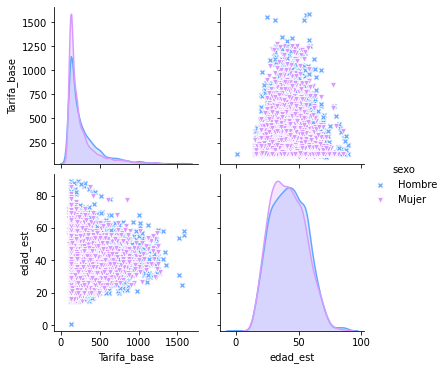

In [118]:
## Existe una brecha salarial para este sector :(
aux = ajustada[ajustada['sector_economico_2'] ==
    'Servicios personales para el hogar y diversos'].sample(frac = .05).copy()

aux = aux[['sexo', 'Tarifa_base', 'edad_est']].sort_values(by = ['sexo']).copy()

colors = ["#66A6FE","#D79BFF"]
sns.set_palette(sns.color_palette(colors))

sns.pairplot(aux,
            hue = 'sexo',
            markers = ['X', 'v'])

In [119]:
## Y ya no necesitamos el rango numérico de edad
ajustada.drop(['ini','fin'], axis = 1, inplace = True)

### Pairplot

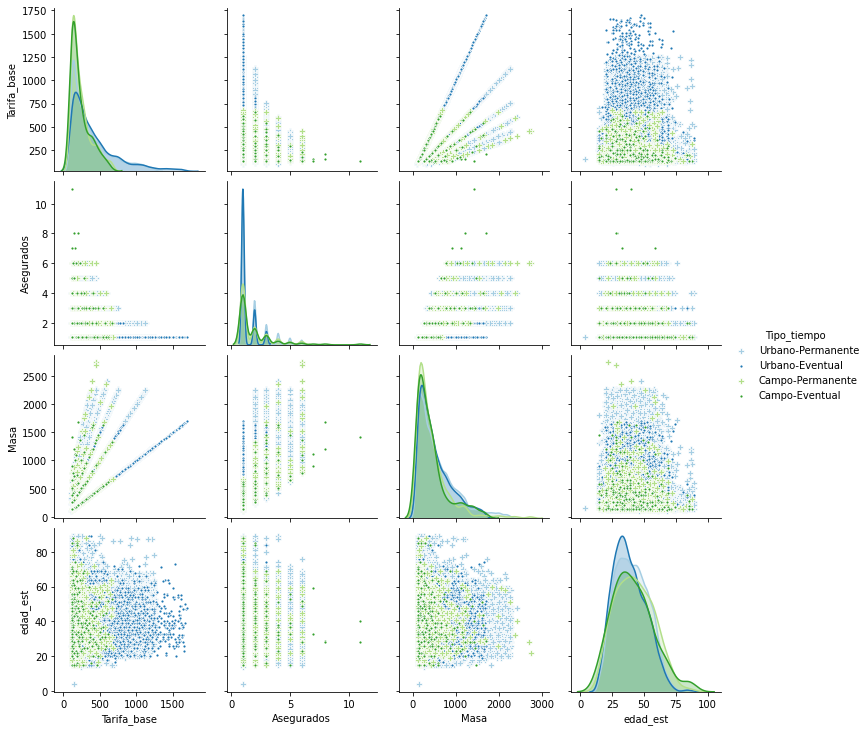

In [120]:
## Correlación de tarifa, masa y cantidad de puestos por tipo y tiempo de puesto
aux = ajustada.sample(frac = .01).sort_values(by = ['Tipo_tiempo'],
                                 ascending = False).copy()
sns.pairplot(aux,
            hue = 'Tipo_tiempo',
            palette = 'Paired',
            markers = ['P','.','P','.'])

## FIN

In [121]:
ajustada.to_csv('/home/ef/Documents/Diplomado/EXAMEN01/imss.csv', index = False)

In [122]:
## La siguiente línea debe ir debajo del código p que suene
Audio(audio_data, rate=framerate, autoplay=True)

In [123]:
## Tiempo total para correr el notebook
end = time.time()
tiempo_tot = end - start
import math
str(int(math.floor(tiempo_tot/60))) + " minutos con " + '{:.2f}'.format(60*(tiempo_tot/60 - math.floor(tiempo_tot/60))) + " segundos"

'12 minutos con 4.86 segundos'